Bu kod için https://mmo.org.tr/sites/default/files/deb1c54814305ca_ek.pdf sitesinde bulunan bulaşık makinesi ile bulanık mantık modellenmesi makalesinden yararlanılmıştır. 

In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [ ]:
!pip install -U scikit-fuzzy

In [120]:
bulasikMiktarı=ctrl.Antecedent(np.arange(0,101,5),"bulasikMiktarı")
kirlilikDerecesi=ctrl.Antecedent(np.arange(0,101,5),"kirlilikDerecesi")
bulasikCinsi=ctrl.Antecedent(np.arange(0,101,5),"bulasikCinsi")
yikamaZamani=ctrl.Consequent(np.arange(30,161,10),"yikamaZamani")
deterjanMiktari=ctrl.Consequent(np.arange(0,101,0.5),"deterjanMiktari")
suSicakligi=ctrl.Consequent(np.arange(35.0,67.6,0.5),"suSicakligi")
ustSepetPompaDevri=ctrl.Consequent(np.arange(2100,3501,100),"ustSepetPompaDevri")
altSepetPompaDevri=ctrl.Consequent(np.arange(2100,3501,100),"altSepetPompaDevri")


In [121]:
bulasikMiktarı.automf(3)
kirlilikDerecesi.automf(3)
bulasikCinsi.automf(3)

In [122]:
yikamaZamani.automf(5)
deterjanMiktari.automf(5)
suSicakligi.automf(3)
ustSepetPompaDevri.automf(5)
altSepetPompaDevri.automf(5)

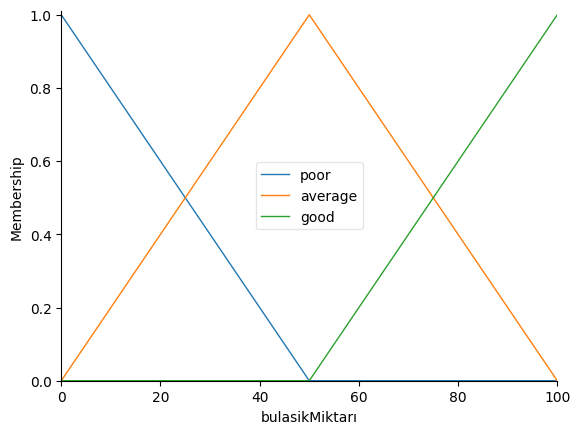

In [178]:
bulasikMiktarı.view()

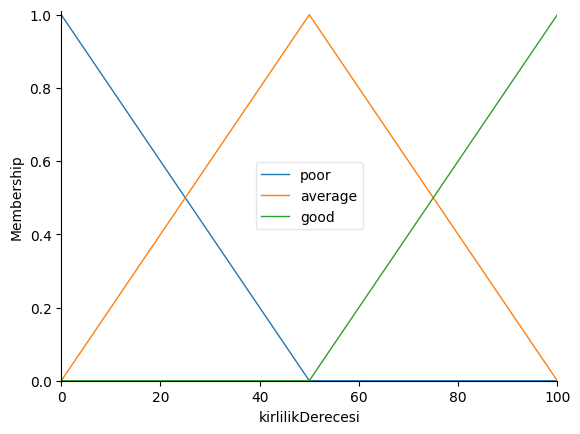

In [179]:
kirlilikDerecesi.view()

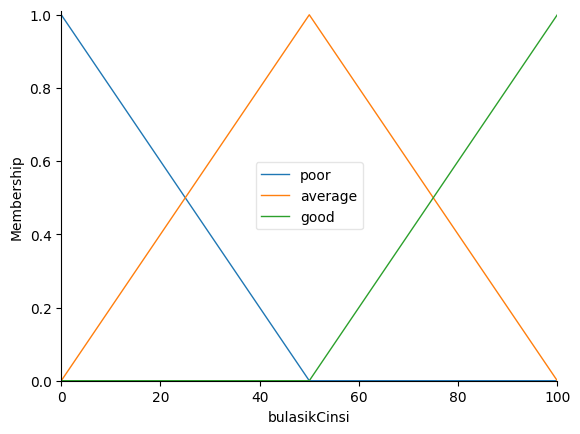

In [180]:
bulasikCinsi.view()

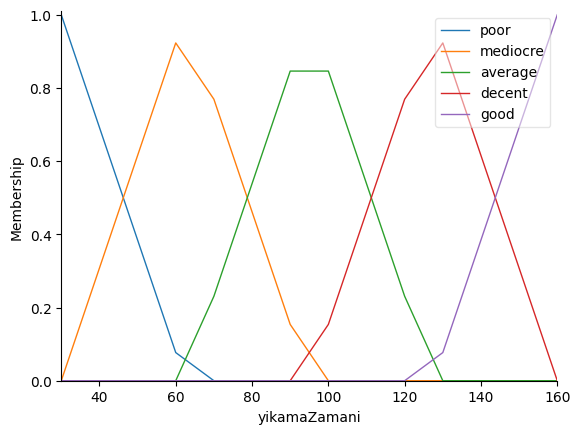

In [181]:
yikamaZamani.view()

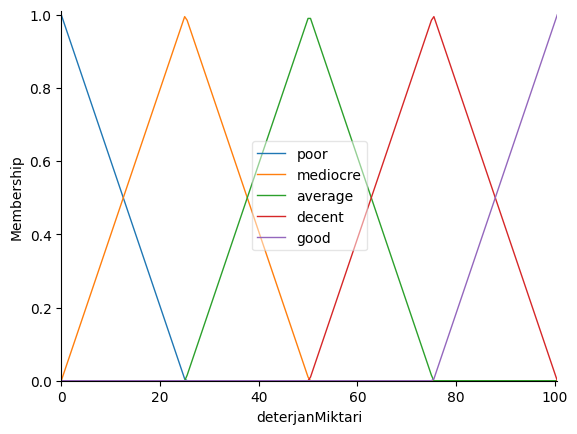

In [182]:
deterjanMiktari.view()

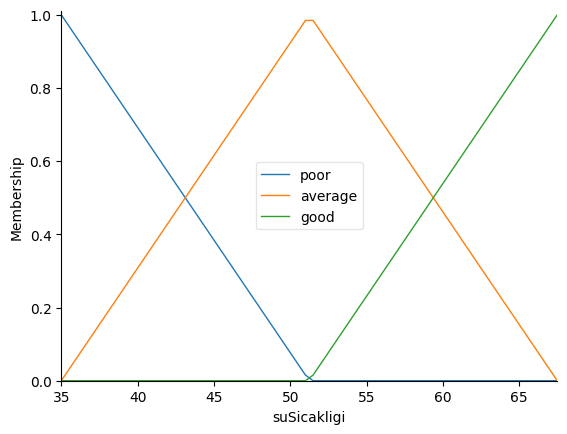

In [183]:
suSicakligi.view()

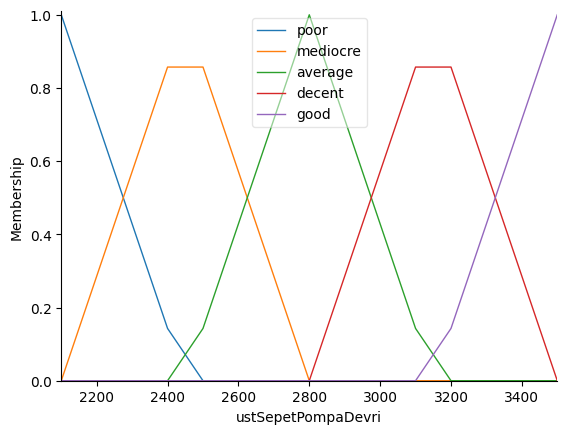

In [184]:
ustSepetPompaDevri.view()

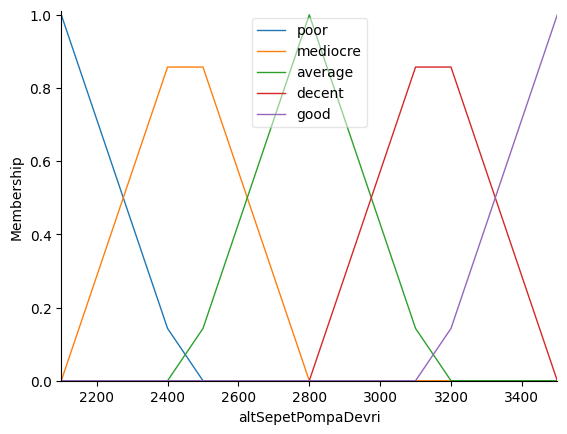

In [185]:
altSepetPompaDevri.view()

yıkama zamanı kuralları

In [152]:
kural1=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["poor"] & bulasikCinsi["poor"], yikamaZamani["poor"])
kural2=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], yikamaZamani["average"])
kural3=ctrl.Rule(bulasikMiktarı["average"] & kirlilikDerecesi["average"] & bulasikCinsi["good"], yikamaZamani["average"])
kural4=ctrl.Rule(bulasikMiktarı["good"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], yikamaZamani["good"])

deterjan miktarı kuralları

In [164]:
kural5=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["poor"] & bulasikCinsi["poor"],deterjanMiktari["poor"])
kural6=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["good"] & bulasikCinsi["average"],deterjanMiktari["average"])
kural7=ctrl.Rule(bulasikMiktarı["average"] & kirlilikDerecesi["average"] & bulasikCinsi["good"], deterjanMiktari["average"])
kural8=ctrl.Rule(bulasikMiktarı["good"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], deterjanMiktari["good"])

su sıcaklığı için kurallar

In [165]:
kural9=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["poor"] & bulasikCinsi["poor"],suSicakligi["poor"])
kural10=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], suSicakligi["good"])
kural11=ctrl.Rule(bulasikMiktarı["average"] & kirlilikDerecesi["average"] & bulasikCinsi["good"], suSicakligi["average"])
kural12=ctrl.Rule(bulasikMiktarı["good"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], suSicakligi["good"])

üst sepet pompa devri için kurallar

In [168]:
kural13=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["poor"] & bulasikCinsi["poor"],ustSepetPompaDevri["poor"])
kural14=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], ustSepetPompaDevri["mediocre"])
kural15=ctrl.Rule(bulasikMiktarı["average"] & kirlilikDerecesi["average"] & bulasikCinsi["good"], ustSepetPompaDevri["decent"])
kural16=ctrl.Rule(bulasikMiktarı["good"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], ustSepetPompaDevri["mediocre"])

alt sepet pompa devri için kurallar

In [169]:
kural17=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["poor"] & bulasikCinsi["poor"],altSepetPompaDevri["poor"])
kural18=ctrl.Rule(bulasikMiktarı["poor"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], altSepetPompaDevri["good"])
kural19=ctrl.Rule(bulasikMiktarı["average"] & kirlilikDerecesi["average"] & bulasikCinsi["good"], altSepetPompaDevri["decent"])
kural20=ctrl.Rule(bulasikMiktarı["good"] & kirlilikDerecesi["good"] & bulasikCinsi["average"], altSepetPompaDevri["good"])

In [170]:
bulasikKontrol=ctrl.ControlSystem([kural1, kural2, kural3, kural4,kural5,kural6,kural7,kural8,kural9,kural10,kural11,kural12,kural13,kural14,kural15,kural16,kural17,kural18,kural19,kural20])
bulasikBelirleme=ctrl.ControlSystemSimulation(bulasikKontrol)

In [172]:
bulasikBelirleme.input["bulasikMiktarı"]=62
bulasikBelirleme.input["kirlilikDerecesi"]=40.1
bulasikBelirleme.input["bulasikCinsi"]=88.7
bulasikBelirleme.compute()
print(bulasikBelirleme.output["yikamaZamani"])
print(bulasikBelirleme.output["deterjanMiktari"])
print(bulasikBelirleme.output["suSicakligi"])
print(bulasikBelirleme.output["ustSepetPompaDevri"])
print(bulasikBelirleme.output["altSepetPompaDevri"])

95.00000000000001
50.24999999999994
51.25
3150.0000000000005
3150.0000000000005


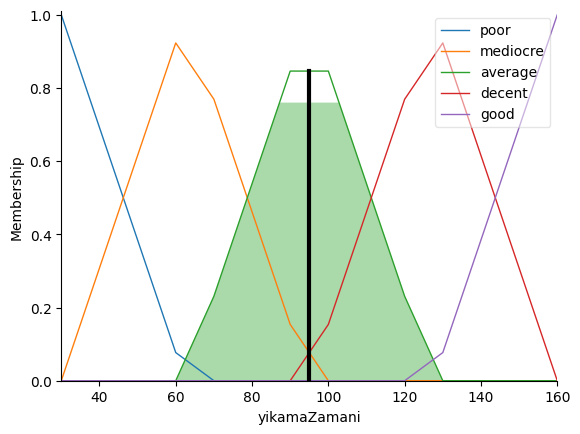

In [173]:
yikamaZamani.view(sim=bulasikBelirleme)

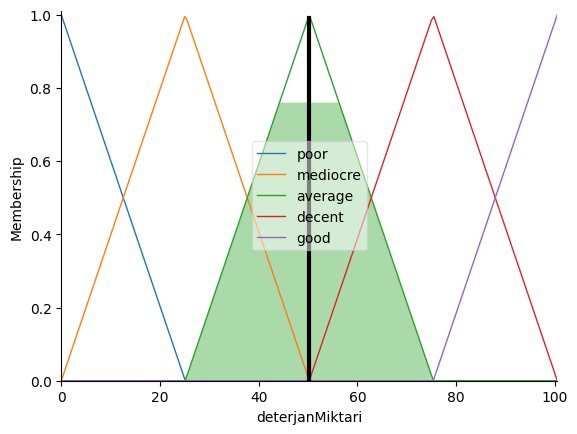

In [174]:
deterjanMiktari.view(sim=bulasikBelirleme)

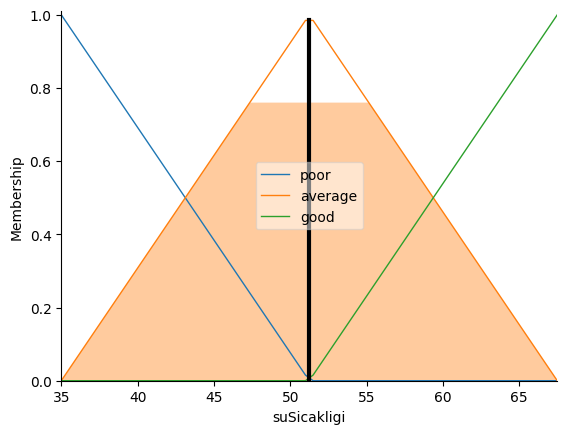

In [175]:
suSicakligi.view(sim=bulasikBelirleme)

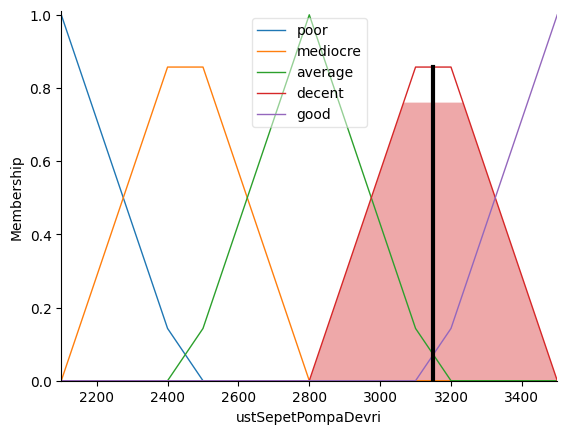

In [176]:
ustSepetPompaDevri.view(sim=bulasikBelirleme)

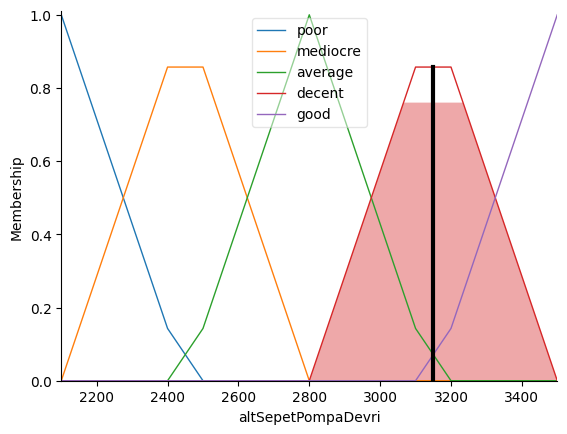

In [177]:
altSepetPompaDevri.view(sim=bulasikBelirleme)